# Import data and data cleansing

In [ ]:
# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project 511/Churn_Modelling.csv', delimiter = ',')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe(include=['int', 'float']).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


# EDA

<ipython-input-6-8111eb745c4d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

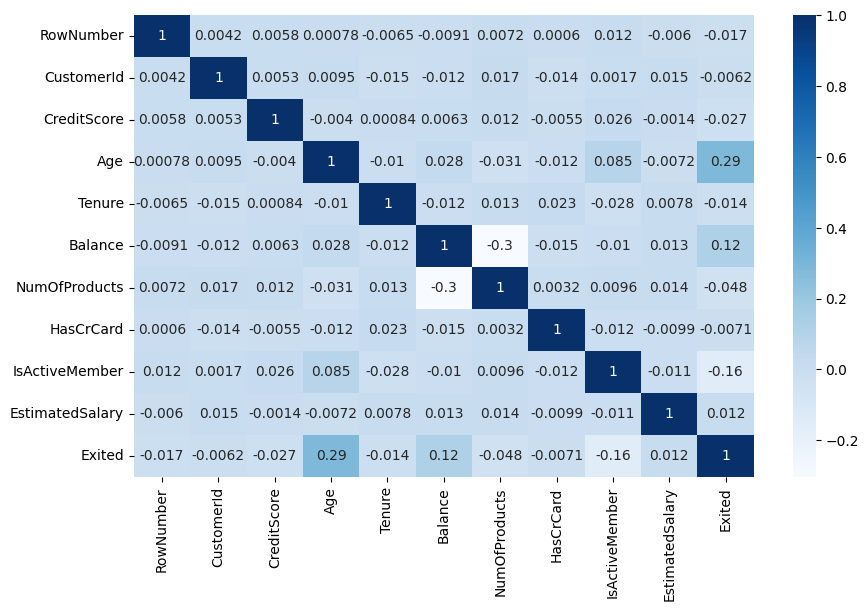

In [ ]:
fig, ax0 = plt.subplots(figsize=(10, 6))

corr = df.corr()

sns.heatmap(corr, annot=True,cmap='Blues', ax=ax0)

## 1.1 Categorical Variables
### Exited

Zero (0) for a customer that has not churned, and
One (1) for a customer that has churned.

In [ ]:
#Exit
df['Exited'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

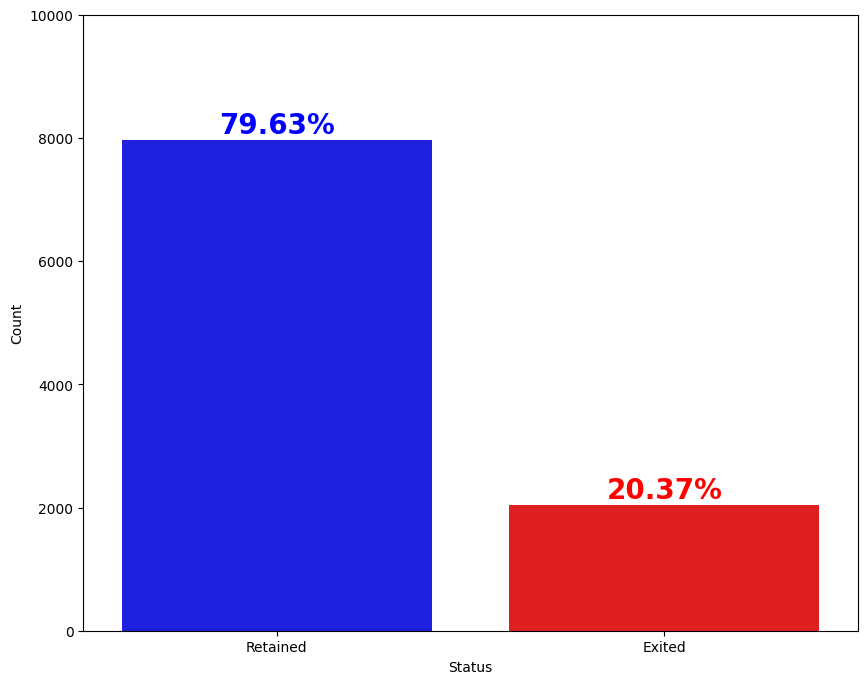

In [ ]:
#Customer Churn Distribution Plot
# target variables ดูจำนวน exited and retained ทั้งหมด + คิดเป็น %
fig, ax1 = plt.subplots(figsize=(10, 8))

font_size = 20
colors = ['blue', 'red']

sns.countplot(x='Exited', data=df, palette=colors, ax=ax1)

for index, value in enumerate(df['Exited'].value_counts()):
    label = '{}%'.format(round((value / df['Exited'].shape[0]) * 100, 2))
    ax1.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                color=colors[index],
                fontweight='bold',
                size=font_size)

ax1.set_xticklabels(['Retained', 'Exited'])
ax1.set_xlabel('Status')
ax1.set_ylabel('Count')
ax1.set_ylim([0, 10000]);

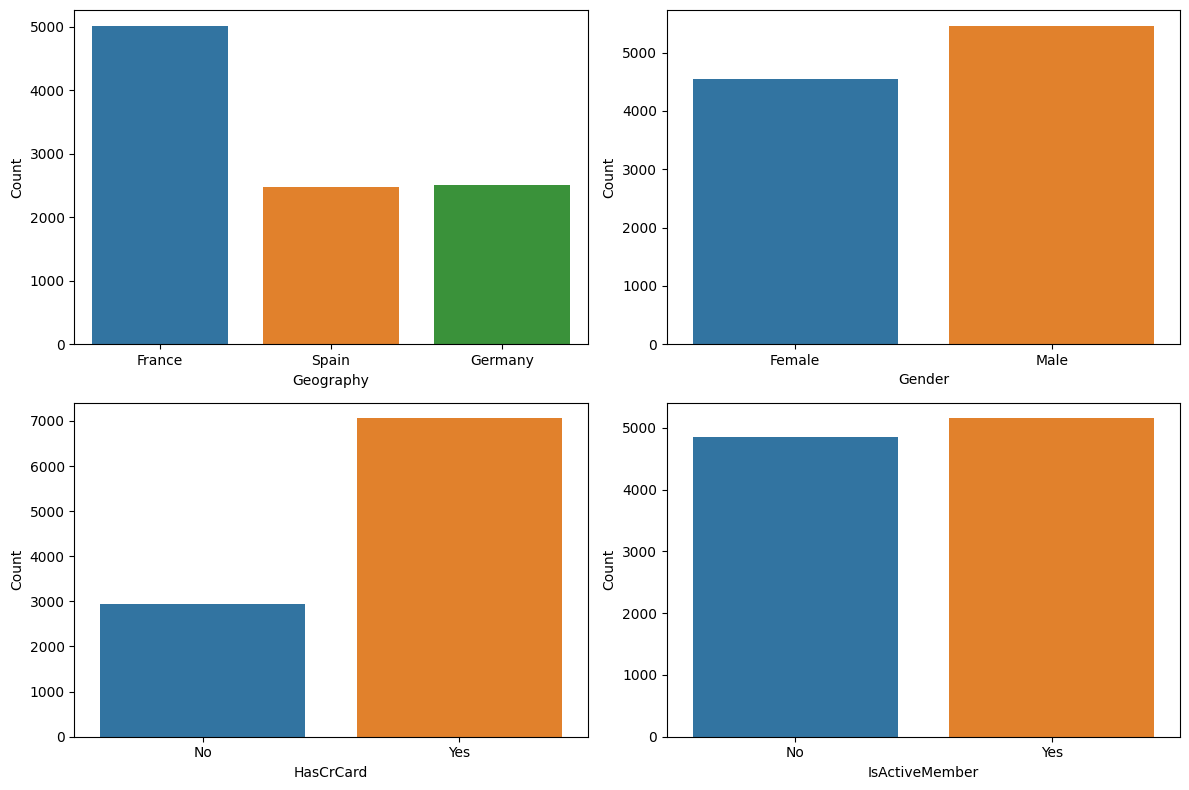

In [ ]:
# ดู distribution ของ categorical features

df_cat = df[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for index, column in enumerate(df_cat.columns):

    plt.subplot(2, 2, index + 1)
    sns.countplot(x=column, data=df)

    plt.ylabel('Count')
    if (column == 'HasCrCard' or column == 'IsActiveMember'):
        plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout();

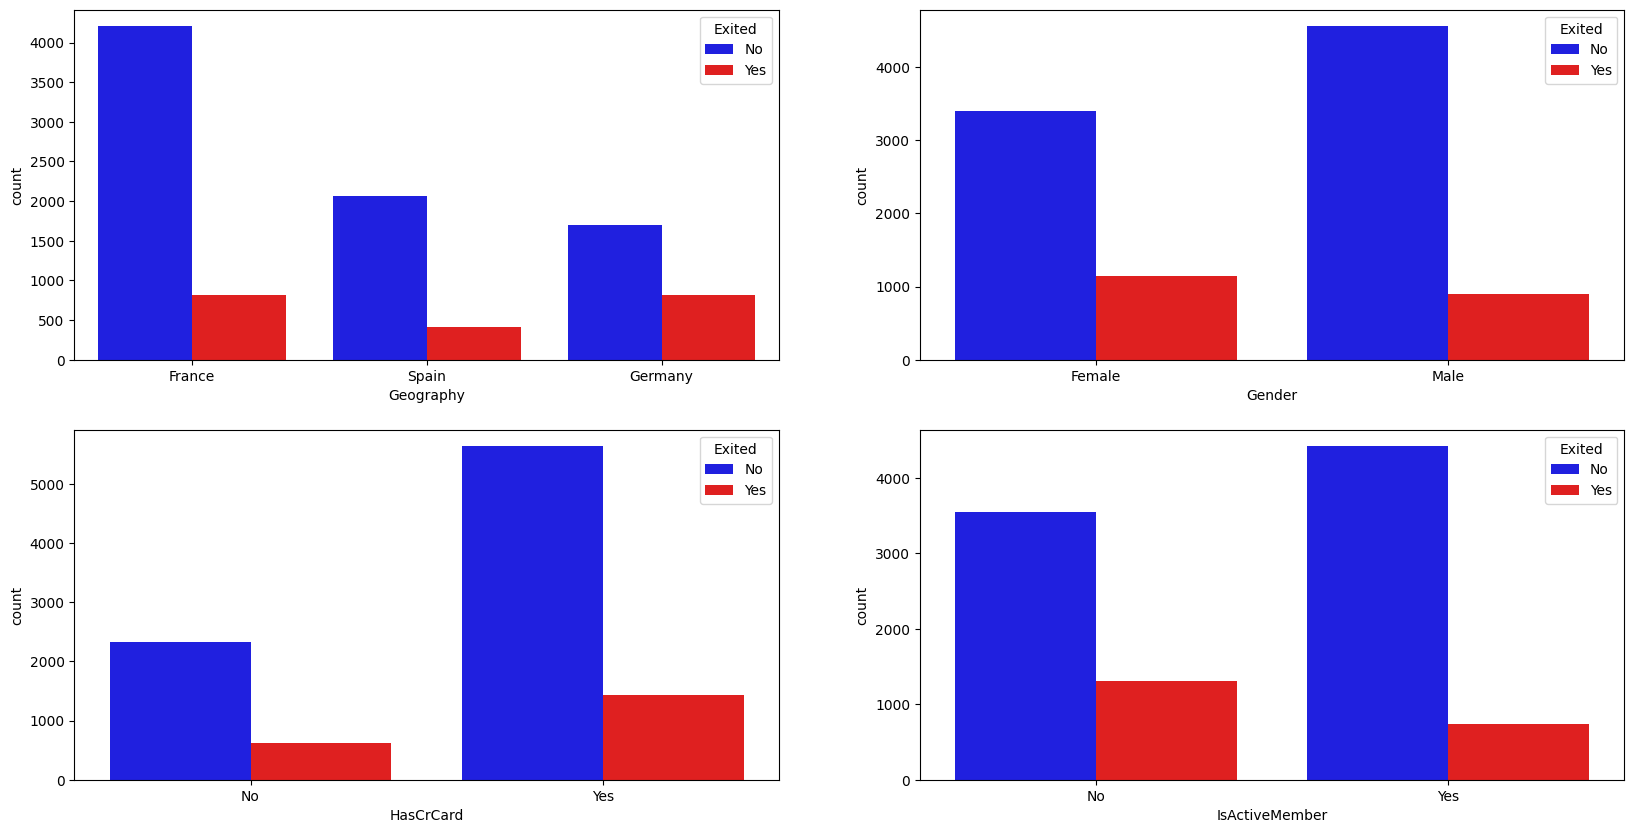

In [ ]:
# review the 'Status' relation with categorical features // ดู correlation ของ Exited ในมุมอื่นๆจาก categorical features
fig, axarr = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0], palette=colors)
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1], palette=colors)
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0], palette=colors)
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1], palette=colors)

# Set x-axis labels for the last row
axarr[1, 0].set_xticklabels(['No', 'Yes'])
axarr[1, 1].set_xticklabels(['No', 'Yes'])

# Change legend labels
axarr[0, 0].legend(title='Exited', labels=['No', 'Yes'])
axarr[0, 1].legend(title='Exited', labels=['No', 'Yes'])
axarr[1, 0].legend(title='Exited', labels=['No', 'Yes'])
axarr[1, 1].legend(title='Exited', labels=['No', 'Yes'])

### Geography

In [ ]:
#Distribution
df['Geography'].value_counts(normalize=True)*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [ ]:
#Distribution of Customer Churn in different Geographies
df.groupby('Geography')['Exited'].value_counts(normalize=True).mul(100)

Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64

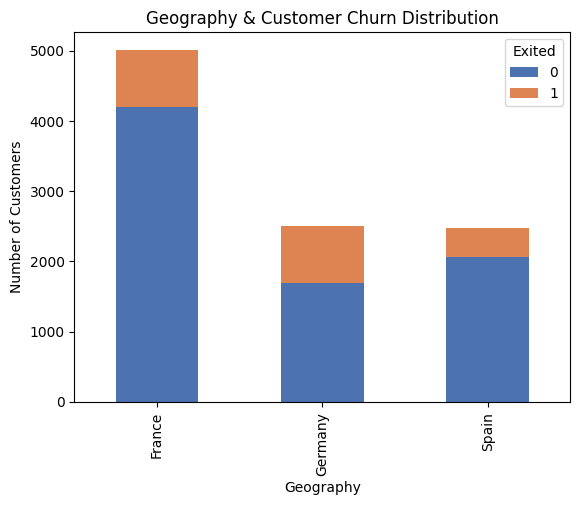

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', stacked=True)

plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Geography & Customer Churn Distribution')

plt.show()

### Gender

In [ ]:
#Distribution
df['Gender'].value_counts(normalize=True)*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [ ]:
#Distribution of Customer Churn between genders
df.groupby('Gender')['Exited'].value_counts(normalize=True).mul(100)

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64

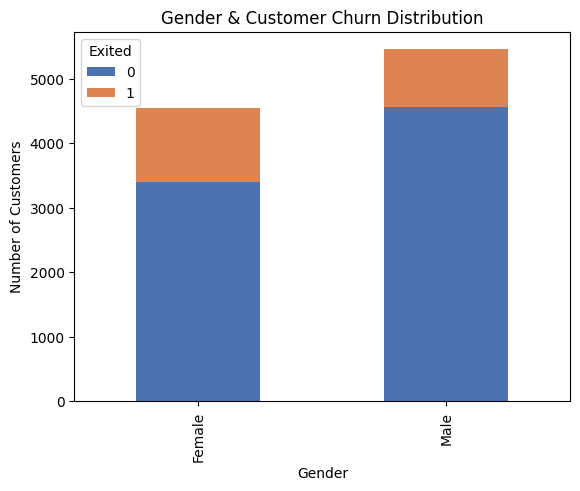

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', stacked=True)

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender & Customer Churn Distribution')

plt.show()

### Tenure

In [ ]:
#Distribution of Tenure
print(df['Tenure'].describe())
print("\n---------------------\n")
print(df['Tenure'].value_counts(normalize=True).mul(100).sort_index())

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

---------------------

0      4.13
1     10.35
2     10.48
3     10.09
4      9.89
5     10.12
6      9.67
7     10.28
8     10.25
9      9.84
10     4.90
Name: Tenure, dtype: float64


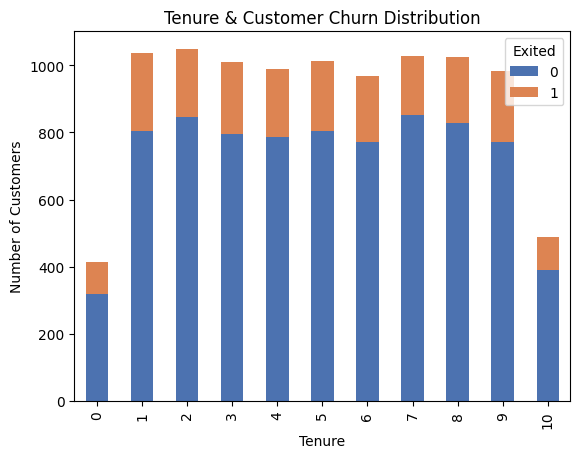

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

pd.crosstab(df['Tenure'], df['Exited']).plot(kind='bar', stacked=True)

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure & Customer Churn Distribution')

plt.show()

### Number of Products

In [ ]:
#Distribution of NumOfProducts
print(df['NumOfProducts'].describe())
print("\n---------------------\n")
print(df['NumOfProducts'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

---------------------

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

---------------------

NumOfProducts  Exited
1              0          72.29
               1          27.71
2              0          92.42
               1           7.58
3              1          82.71
               0          17.29
4              1         100.00
Name: Exited, dtype: float64


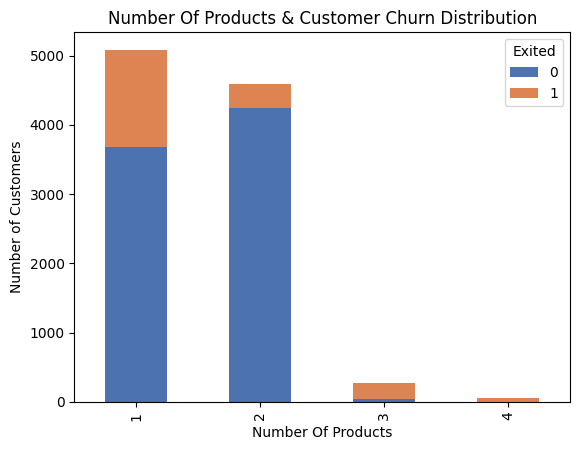

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

pd.crosstab(df['NumOfProducts'], df['Exited']).plot(kind='bar', stacked=True)

plt.xlabel('Number Of Products')
plt.ylabel('Number of Customers')
plt.title('Number Of Products & Customer Churn Distribution')

plt.show()

### Has Credit Card

In [ ]:
#Distribution of HasCrCard
print(df['HasCrCard'].describe())
print("\n---------------------\n")
print(df['HasCrCard'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('HasCrCard')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64

---------------------

0    2945
1    7055
Name: HasCrCard, dtype: int64

---------------------

HasCrCard  Exited
0          0         79.19
           1         20.81
1          0         79.82
           1         20.18
Name: Exited, dtype: float64


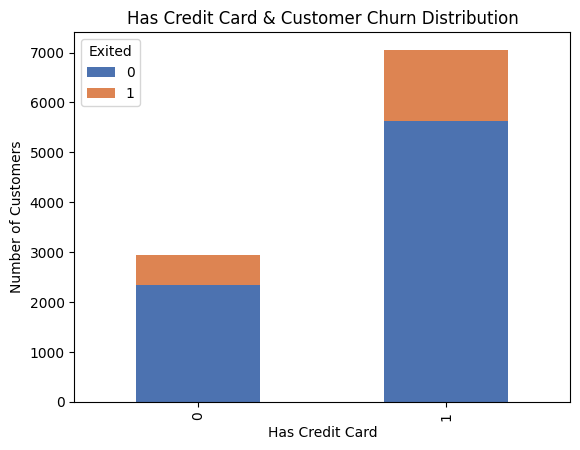

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

pd.crosstab(df['HasCrCard'], df['Exited']).plot(kind='bar', stacked=True)

plt.xlabel('Has Credit Card')
plt.ylabel('Number of Customers')
plt.title('Has Credit Card & Customer Churn Distribution')

plt.show()

### Is Active Member

In [ ]:
#Distribution of IsActiveMember
print(df['IsActiveMember'].describe())
print("\n---------------------\n")
print(df['IsActiveMember'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64

---------------------

0    4849
1    5151
Name: IsActiveMember, dtype: int64

---------------------

IsActiveMember  Exited
0               0         73.15
                1         26.85
1               0         85.73
                1         14.27
Name: Exited, dtype: float64


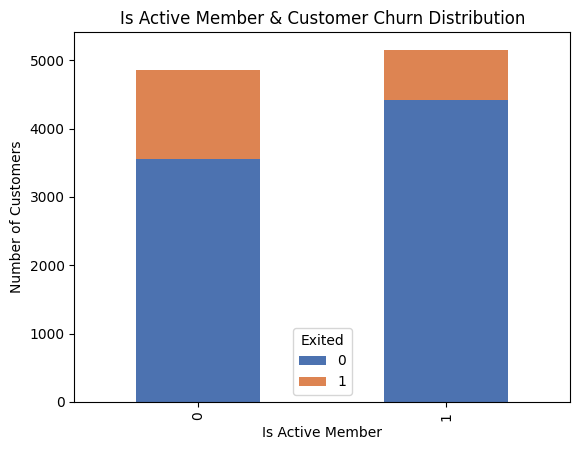

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

pd.crosstab(df['IsActiveMember'], df['Exited']).plot(kind='bar', stacked=True)

plt.xlabel('Is Active Member')
plt.ylabel('Number of Customers')
plt.title('Is Active Member & Customer Churn Distribution')

plt.show()

## 1.2 Numerical Variables

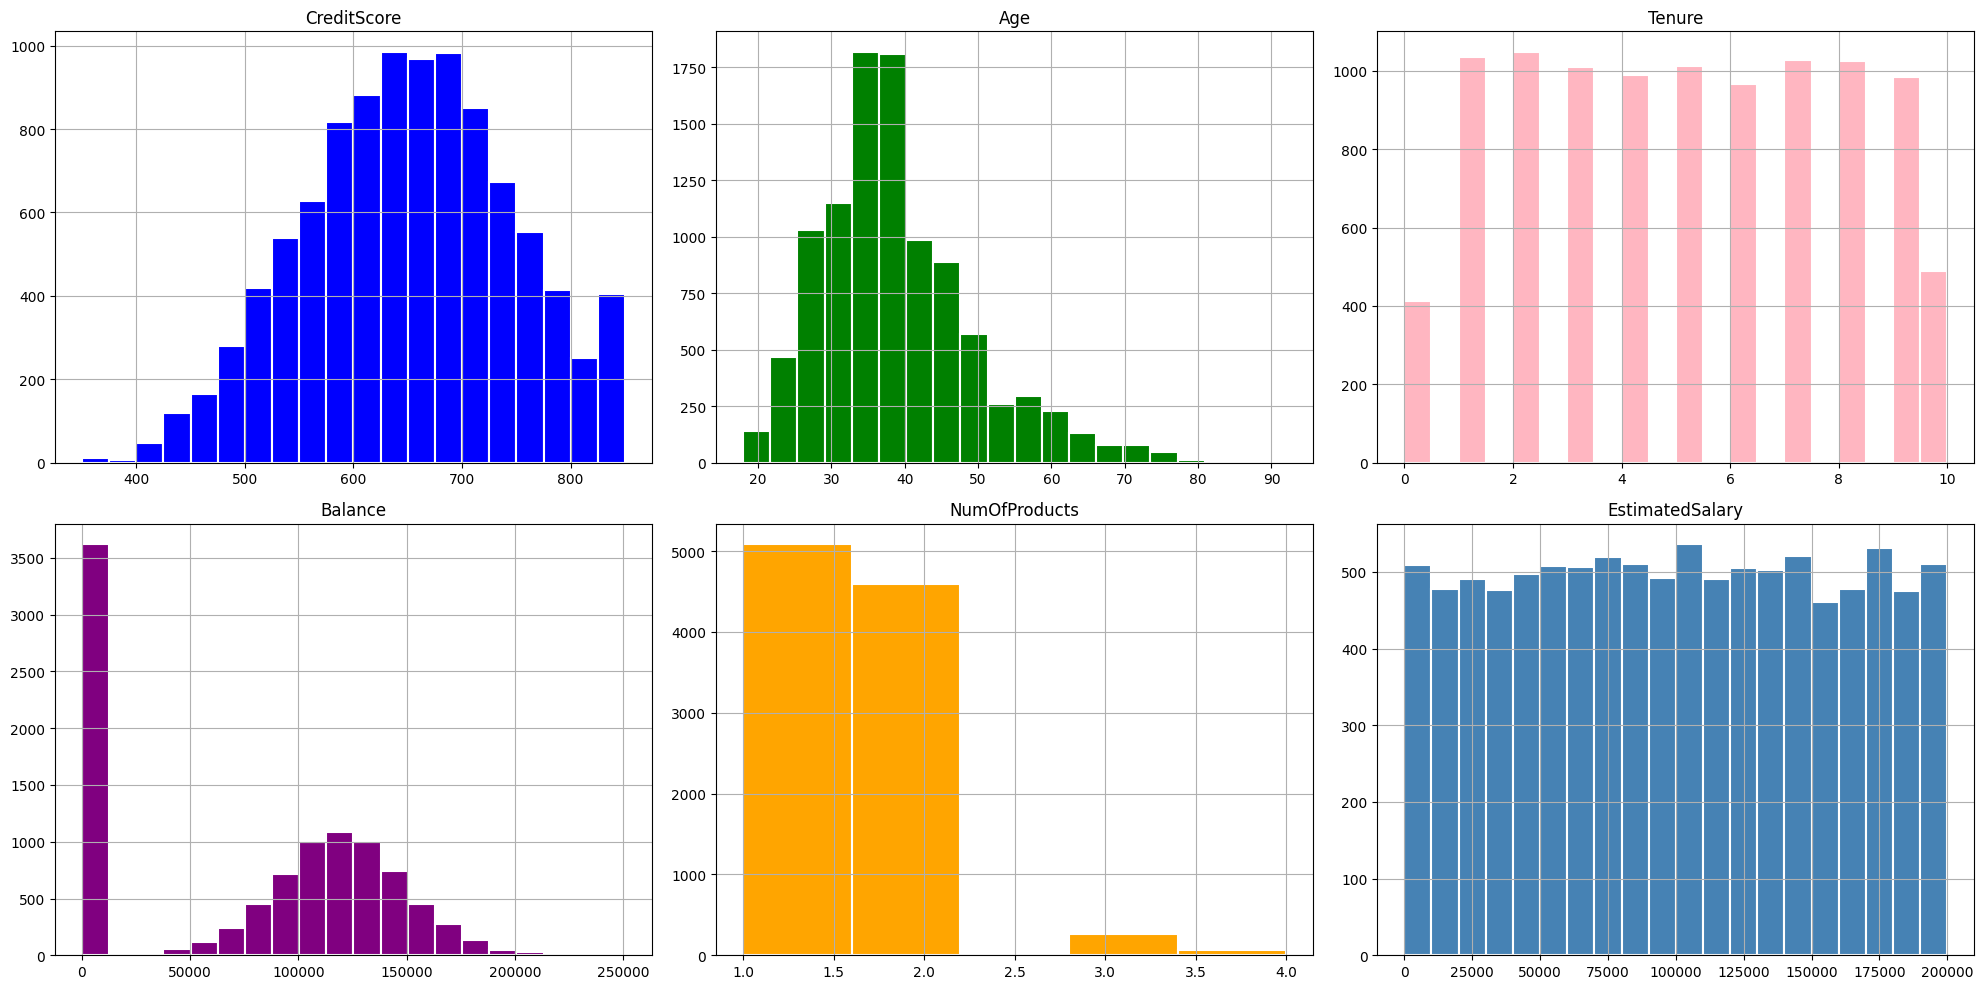

In [ ]:
# ดู distribution ในแต่ละ numerical features ทั้งหมด

# Create a 3x3 subplot layout
fig, axarr1 = plt.subplots(2, 3, figsize=(20, 10))

# Plot histograms in each subplot
df['CreditScore'].hist(ax=axarr1[0, 0], bins=20, color='blue', linewidth=1.5, edgecolor='white')
df['Age'].hist(ax=axarr1[0, 1], bins=20, color='green', linewidth=1.5, edgecolor='white')
df['Tenure'].hist(ax=axarr1[0, 2], bins=20, color='lightpink', linewidth=1.5, edgecolor='white')
df['Balance'].hist(ax=axarr1[1, 0], bins=20, color='purple', linewidth=1.5, edgecolor='white')
df['NumOfProducts'].hist(ax=axarr1[1, 1], bins=5, color='orange', linewidth=1.5, edgecolor='white')
df['EstimatedSalary'].hist(ax=axarr1[1, 2], bins=20, color='steelblue', linewidth=1.5, edgecolor='white')

# Add labels and title to each subplot
axarr1[0, 0].set_title('CreditScore')
axarr1[0, 1].set_title('Age')
axarr1[0, 2].set_title('Tenure')
axarr1[1, 0].set_title('Balance')
axarr1[1, 1].set_title('NumOfProducts')
axarr1[1, 2].set_title('EstimatedSalary')

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='count'>

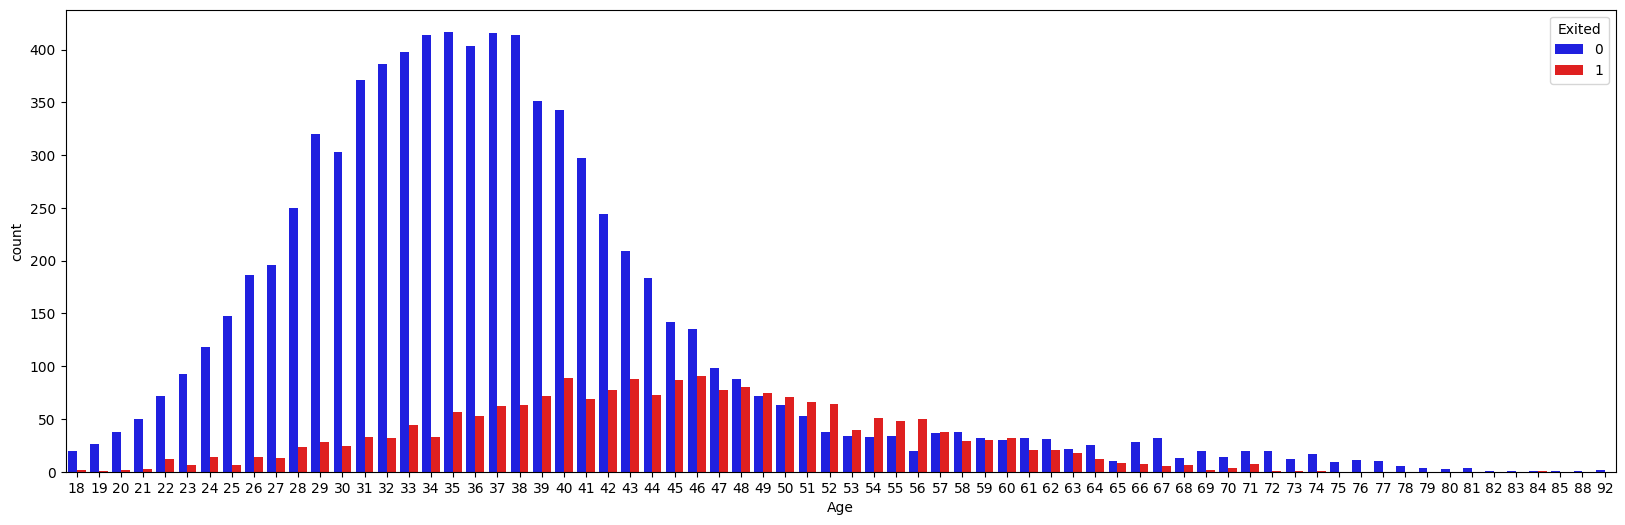

In [ ]:
# จาก Correlation พบว่า Age มีความสัมพันธ์กับ Exited จึงพล็อตดู distribution
fig, ax11 = plt.subplots(figsize=(20, 6))
sns.countplot(x='Age', hue = 'Exited',data = df, ax=ax11, palette=colors)

### Credit score

In [ ]:
#Distribution of Credit Score
print(df['CreditScore'].describe())
print("\n---------------------\n")
print(df['CreditScore'].value_counts())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

---------------------

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64


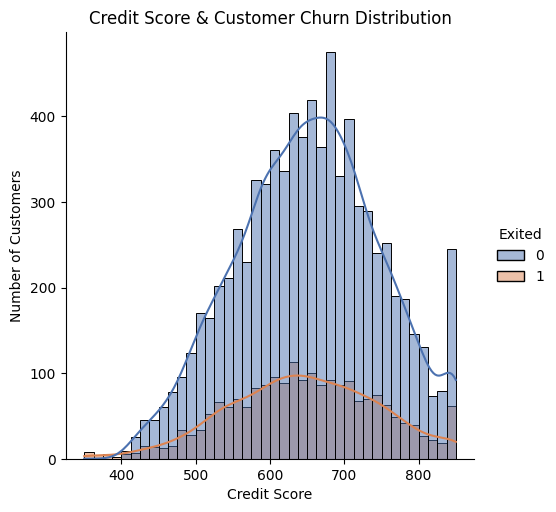

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='CreditScore',hue='Exited', kde=True, bins=40)

plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Credit Score & Customer Churn Distribution')

plt.show()

### Age

In [ ]:
#Distribution of Age
print(df['Age'].describe())
print("\n---------------------\n")
print(df['Age'].value_counts())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

---------------------

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


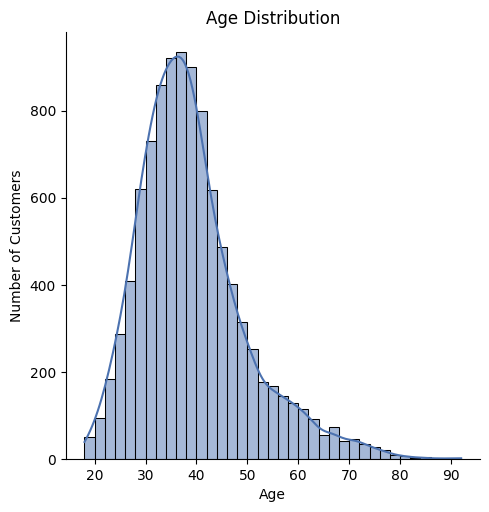

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='Age', kde=True, bins=37)

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution')

plt.show()

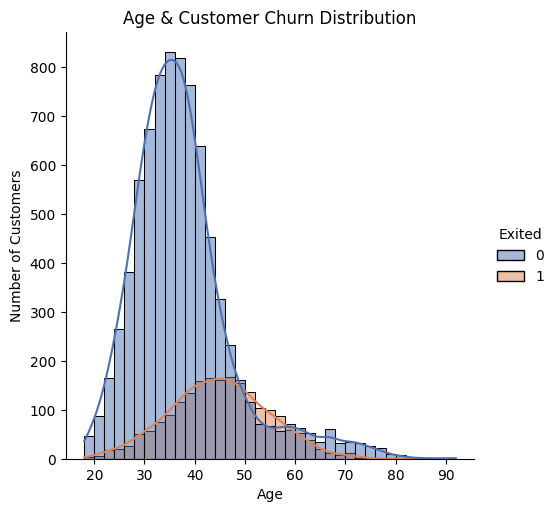

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='Age', hue='Exited',kde=True, bins=37)

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age & Customer Churn Distribution')

plt.show()

### Balance

In [ ]:
#Distribution of Balance
print(df['Balance'].describe())
print("\n---------------------\n")
print(df['Balance'].value_counts().sort_index())

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

---------------------

0.00         3617
3768.69         1
12459.19        1
14262.80        1
16893.59        1
             ... 
216109.88       1
221532.80       1
222267.63       1
238387.56       1
250898.09       1
Name: Balance, Length: 6382, dtype: int64


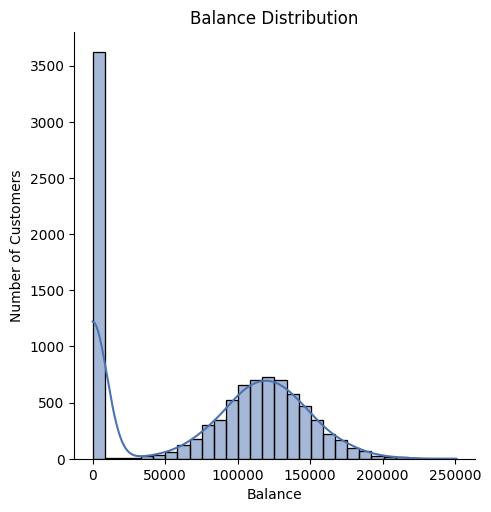

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='Balance', kde=True, bins=30)

plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance Distribution')

plt.show()

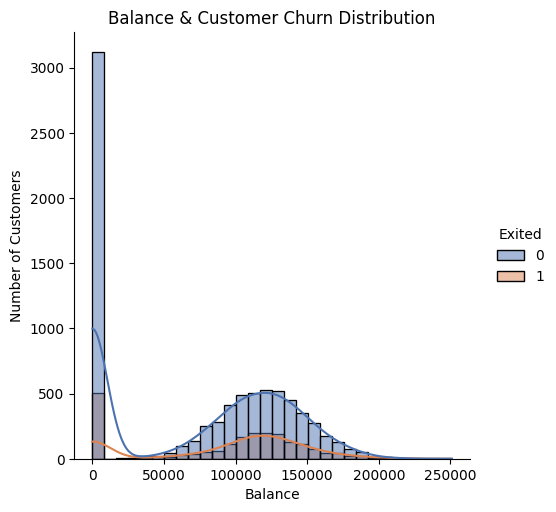

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='Balance', hue='Exited',kde=True, bins=30)

plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance & Customer Churn Distribution')

plt.show()

### EstimatedSalary

In [ ]:
#Distribution of EstimatedSalary
print(df['EstimatedSalary'].describe())
print("\n---------------------\n")
print(df['EstimatedSalary'].value_counts().sort_index())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

---------------------

11.58        1
90.07        1
91.75        1
96.27        1
106.67       1
            ..
199909.32    1
199929.17    1
199953.33    1
199970.74    1
199992.48    1
Name: EstimatedSalary, Length: 9999, dtype: int64


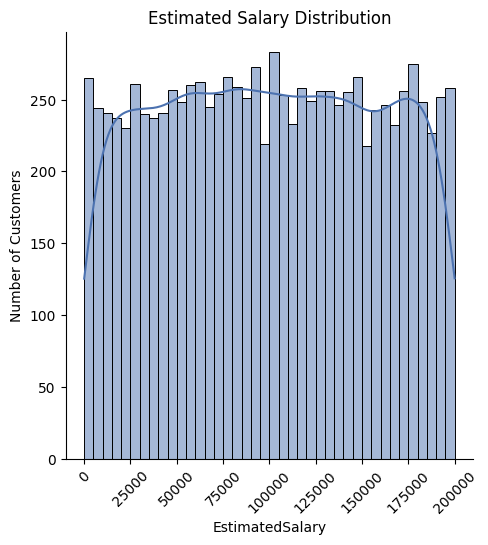

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='EstimatedSalary', kde=True, bins=40)

plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary Distribution')
plt.xticks(rotation=45)

plt.show()

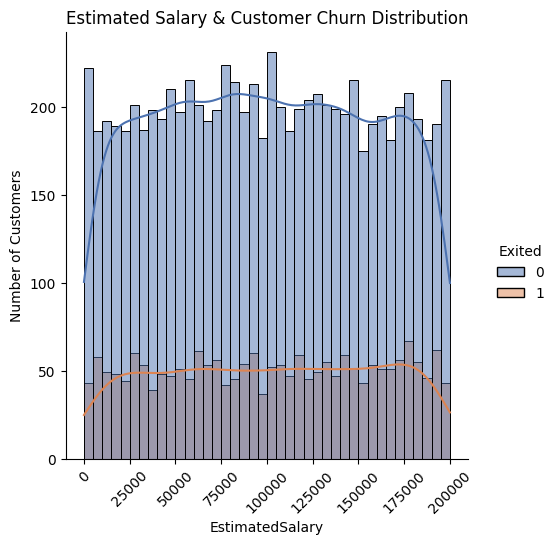

In [ ]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='EstimatedSalary',hue='Exited', kde=True, bins=40)

plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary & Customer Churn Distribution')
plt.xticks(rotation=45)

plt.show()

# Feature engineering (เพิ่ม feature จากข้อมูล)

## Feature selection + ลบฟีเจอที่ไม่ได้ใช้

In [ ]:
print("Size of Dataset before dropping columns : ",df.shape)

drop_columns = ['RowNumber','CustomerId','Surname']
df.drop(drop_columns,axis=1,inplace=True)

print("Size of Dataset after dropping columns : ",df.shape)

Size of Dataset before dropping columns :  (10000, 14)
Size of Dataset after dropping columns :  (10000, 11)


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Processing

## One Hot Encoding

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
categorical_columns = ['Geography','Gender']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
data = pd.concat([df, one_hot_encoded], axis=1)

#Drop original categorical columns
data.drop(categorical_columns,axis=1,inplace=True)

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Features Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


# Spliting Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Exited', axis=1)
y = data['Exited']

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7826,-0.026165,1.151700,-1.041760,0.642510,-0.911583,1,0,-1.668808,0,1,0,1,0
980,-0.584891,-1.136786,-1.733315,1.932163,-0.911583,0,0,0.901137,1,0,0,0,1
116,0.180771,-0.183251,0.341352,1.464533,-0.911583,1,0,0.270365,0,1,0,1,0
1163,0.998166,-0.660018,-0.004426,-0.144097,0.807737,0,1,-0.395076,0,1,0,1,0
1752,0.967126,0.198164,-1.041760,0.122247,-0.911583,1,0,1.694704,0,1,0,1,0


In [ ]:
y_train.head()

7826    1
980     0
116     0
1163    0
1752    0
Name: Exited, dtype: int64

## Class imbalance effects to the model prediction > use SMOTE to resampling

In [ ]:
# y train is not balance the model prediction will predict the majority as always
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

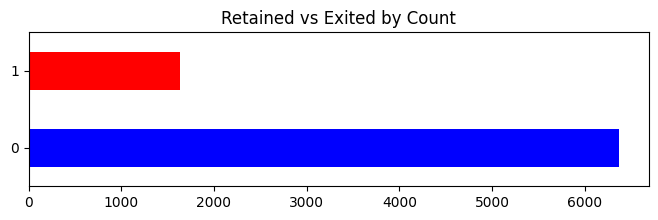

In [ ]:
plt.figure(figsize=(8,2))
y_train.value_counts().plot(kind='barh', color=['blue', 'red'])
plt.title("Retained vs Exited by Count")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=88)
X_train, y_train = smote.fit_resample(X_train, y_train)

y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

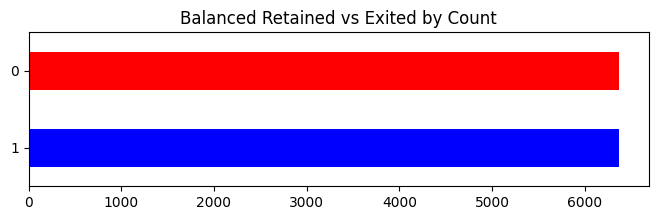

In [ ]:
plt.figure(figsize=(8,2))
y_train.value_counts().plot(kind='barh', color=['blue', 'red'])
plt.title("Balanced Retained vs Exited by Count")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=88, stratify=y_train)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10192, 13)
(2548, 13)
(10192,)
(2548,)


# Building Models

###K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define a range of n_neighbors values
param_grid = {'n_neighbors': list(range(1, 30, 2))}
print(param_grid)

# Create a KNeighborsClassifier
knn = KNeighborsClassifier()

# Create GridSearchCV with the specified parameter grid and scoring metric (accuracy)
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29]},
             return_train_score=True)

In [ ]:
best_results = pd.DataFrame(grid_search_knn.cv_results_)
best_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.019295,0.000971,0.087064,0.005113,1,{'n_neighbors': 1},0.887255,0.873529,0.893032,0.904809,0.888126,0.905790,0.886163,0.902846,0.882237,0.873405,0.889719,0.011290,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.024285,0.006493,0.127540,0.026103,3,{'n_neighbors': 3},0.868627,0.856863,0.863592,0.884200,0.863592,0.888126,0.858685,0.871443,0.849853,0.869480,0.867446,0.011215,2,0.932839,0.932839,0.932192,0.930666,0.932519,0.932301,0.935899,0.931756,0.933828,0.933064,0.932790,0.001307
2,0.022738,0.006733,0.142878,0.036767,5,{'n_neighbors': 5},0.859804,0.850980,0.850834,0.865554,0.838077,0.881256,0.848871,0.868499,0.846909,0.845927,0.855671,0.012275,3,0.906454,0.906891,0.903303,0.904175,0.909408,0.904720,0.907991,0.903303,0.907228,0.907228,0.906070,0.001976
3,0.023312,0.006229,0.155147,0.033253,7,{'n_neighbors': 7},0.857843,0.836275,0.840039,0.866536,0.834151,0.876349,0.819431,0.858685,0.843965,0.842983,0.847626,0.016147,4,0.889882,0.891191,0.889676,0.888041,0.892729,0.889240,0.890984,0.887387,0.889894,0.890330,0.889935,0.001459
4,0.024347,0.006969,0.174755,0.037673,9,{'n_neighbors': 9},0.857843,0.839216,0.836114,0.863592,0.831207,0.869480,0.817468,0.851816,0.829244,0.843965,0.843994,0.015672,5,0.876799,0.877889,0.879538,0.876921,0.880192,0.876594,0.881064,0.874305,0.880301,0.877466,0.878107,0.002007


<ipython-input-30-49ae5f01630d>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_neighbors.astype(np.float),
<ipython-input-30-49ae5f01630d>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_neighbors.astype(np.float),


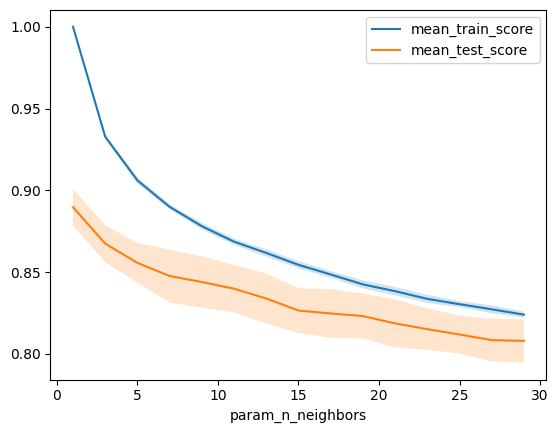

In [ ]:
results = pd.DataFrame(grid_search_knn.cv_results_)
results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.show()

In [ ]:
#หา k_n ที่ดีที่สุด
print("Best parameter {}".format(grid_search_knn.best_params_))
print("Best mean CV score: {:.3f}".format(grid_search_knn.best_score_))

Best mean CV score: 0.890
Best parameter {'n_neighbors': 1}


### Gradient boosting


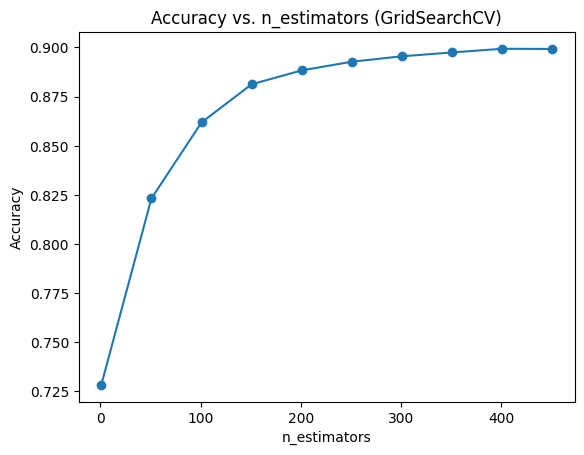

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define a range of n_estimators values for Gradient Boosting
param_grid = {'n_estimators': list(range(1, 500, 50))}

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Create GridSearchCV with the specified parameter grid and scoring metric (accuracy)
grid_search_gb = GridSearchCV(gb_classifier, param_grid, scoring='accuracy', cv=10, return_train_score=True)

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Plot the accuracy scores for different n_estimators values
plt.plot(param_grid['n_estimators'], grid_search_gb.cv_results_['mean_test_score'], marker='o')
plt.title('Accuracy vs. n_estimators (GridSearchCV)')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
best_results = pd.DataFrame(grid_search_gb.cv_results_)
best_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.022837,0.001051,0.003094,0.000404,1,{'n_estimators': 1},0.735294,0.729412,0.716389,0.724239,0.740922,0.729146,0.715407,0.745829,0.727184,0.720314,0.728414,0.009523,10,0.732119,0.732774,0.730513,0.729641,0.727788,0.729096,0.739671,0.730950,0.740107,0.730077,0.732274,0.004039
1,1.104711,0.174369,0.005873,0.001265,51,{'n_estimators': 51},0.815686,0.817647,0.797841,0.824338,0.830226,0.864573,0.805692,0.837095,0.821394,0.817468,0.823196,0.017403,9,0.829045,0.830353,0.832334,0.830590,0.829609,0.837240,0.830808,0.833751,0.835823,0.835277,0.832483,0.002724
2,2.100529,0.333331,0.005984,0.000932,101,{'n_estimators': 101},0.851961,0.854902,0.843965,0.855741,0.859666,0.892051,0.848871,0.878312,0.867517,0.865554,0.861854,0.013804,8,0.868513,0.870911,0.871689,0.868091,0.870380,0.876485,0.869072,0.872234,0.878121,0.870380,0.871588,0.003138
3,2.995952,0.408457,0.006451,0.000830,151,{'n_estimators': 151},0.881373,0.861765,0.870461,0.879293,0.893032,0.906771,0.866536,0.883219,0.887144,0.883219,0.881281,0.012446,7,0.896424,0.896097,0.895890,0.894146,0.894582,0.895345,0.891748,0.893492,0.896980,0.894146,0.894885,0.001497
4,4.167623,0.722012,0.007959,0.001588,201,{'n_estimators': 201},0.885294,0.871569,0.883219,0.885182,0.894014,0.913641,0.887144,0.893032,0.884200,0.886163,0.888346,0.010220,6,0.904819,0.904710,0.903957,0.902322,0.903194,0.900578,0.902104,0.904829,0.903194,0.903739,0.903345,0.001306


<ipython-input-35-5c3e75d8aed5>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.float),
<ipython-input-35-5c3e75d8aed5>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.float),


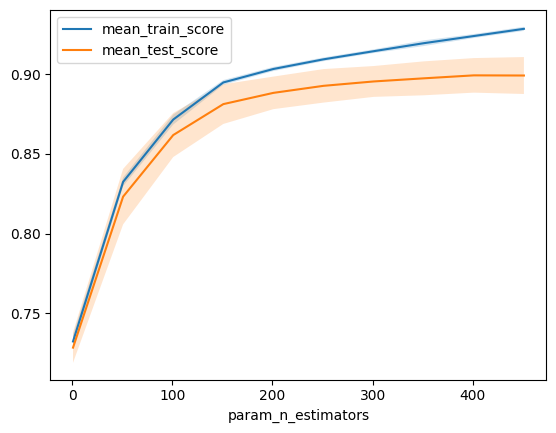

In [ ]:
results = pd.DataFrame(grid_search_gb.cv_results_)
results.plot('param_n_estimators', 'mean_train_score')
results.plot('param_n_estimators', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_estimators.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_estimators.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
print("\nModel Evaluation:")
print("Best Parameters: ", grid_search_gb.best_params_)
print("Best Cross-Validation: {:.2f}".format(grid_search_gb.best_score_))


Model Evaluation:
Best Parameters:  {'n_estimators': 401}
Best Cross-Validation: 0.90


### Random Forest Classifier

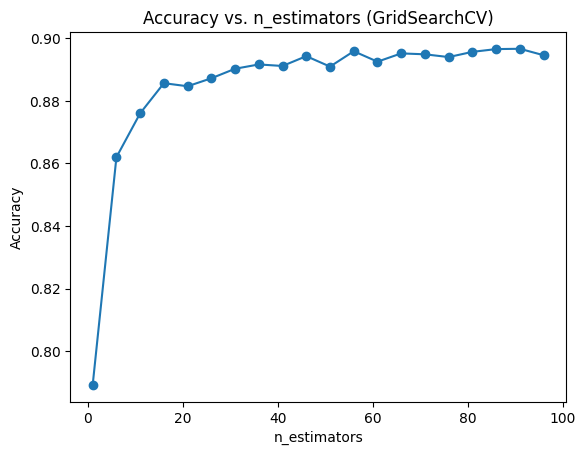

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define a range of n_estimators values
param_grid = {'n_estimators': list(range(1, 100, 5))}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Create GridSearchCV with the specified parameter grid and scoring metric (accuracy)
grid_search_rf = GridSearchCV(rf_classifier, param_grid, scoring='accuracy', cv=10, return_train_score=True)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Plot the accuracy scores for different n_estimators values
plt.plot(param_grid['n_estimators'], grid_search_rf.cv_results_['mean_test_score'], marker='o')
plt.title('Accuracy vs. n_estimators (GridSearchCV)')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
best_results = pd.DataFrame(grid_search_rf.cv_results_)
best_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.029253,0.004153,0.005268,0.002126,1,{'n_estimators': 1},0.779412,0.792157,0.804711,0.785083,0.803729,0.795878,0.782139,0.802748,0.773307,0.773307,0.789247,0.011646,20,0.917575,0.925098,0.920637,0.924234,0.924779,0.922490,0.922708,0.926633,0.924561,0.923144,0.923186,0.002445
1,0.120242,0.004358,0.006957,0.001015,6,{'n_estimators': 6},0.861765,0.864706,0.842983,0.870461,0.876349,0.866536,0.849853,0.874387,0.846909,0.865554,0.861950,0.010993,19,0.984191,0.984736,0.983866,0.984084,0.983321,0.985501,0.984084,0.984738,0.984302,0.983539,0.984236,0.000601
2,0.219934,0.006182,0.008909,0.001044,11,{'n_estimators': 11},0.876471,0.870588,0.860648,0.863592,0.890088,0.880275,0.882237,0.881256,0.880275,0.874387,0.875982,0.008505,18,0.995203,0.994985,0.995312,0.994876,0.995421,0.996402,0.995312,0.993677,0.996184,0.994549,0.995192,0.000734
3,0.221599,0.004391,0.008381,0.000839,16,{'n_estimators': 16},0.888235,0.880392,0.870461,0.886163,0.898921,0.896958,0.874387,0.899902,0.874387,0.886163,0.885597,0.010131,16,0.997601,0.997274,0.996730,0.998147,0.997166,0.997929,0.997493,0.997929,0.997711,0.998147,0.997613,0.000435
4,0.304482,0.020672,0.010681,0.001410,21,{'n_estimators': 21},0.894118,0.880392,0.880275,0.881256,0.896958,0.898921,0.880275,0.894014,0.869480,0.870461,0.884615,0.010158,17,0.998256,0.999237,0.998583,0.998801,0.999128,0.999019,0.998801,0.999346,0.998256,0.998692,0.998812,0.000360


<ipython-input-39-62ceaadf76f4>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.float),
<ipython-input-39-62ceaadf76f4>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.float),


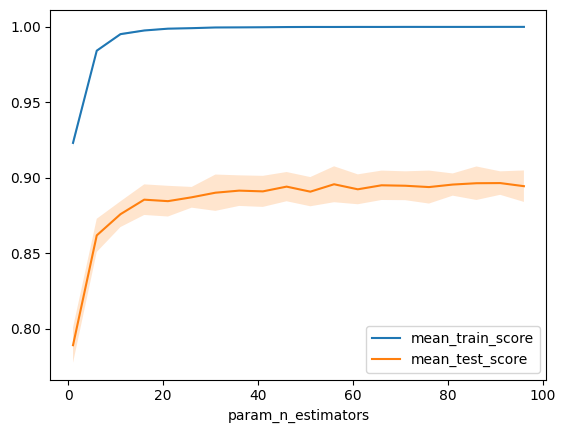

In [ ]:
results = pd.DataFrame(grid_search_rf.cv_results_)
results.plot('param_n_estimators', 'mean_train_score')
results.plot('param_n_estimators', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_estimators.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_estimators.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
print("\nModel Evaluation:")
print("Best Parameters: ", grid_search_rf.best_params_)
print("Best Cross-Validation: {:.2f}".format(grid_search_rf.best_score_))

### Logistic Regression

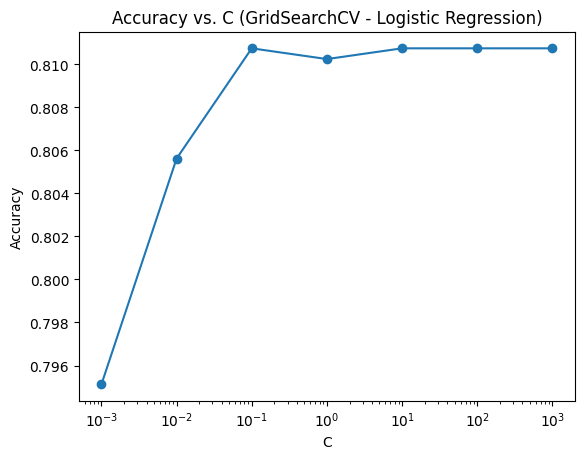


Logistic Regression Model Evaluation:
Best Parameters:  {'C': 0.1}
Best Cross-Validation: 0.81


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define a range of C values for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a Logistic Regression model
lr_classifier = LogisticRegression()

# Create GridSearchCV with the specified parameter grid and scoring metric (accuracy)
grid_search_lr = GridSearchCV(lr_classifier, param_grid_lr, scoring='accuracy', cv=10, return_train_score=True)

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Plot the accuracy scores for different C values
plt.plot(param_grid_lr['C'], grid_search_lr.cv_results_['mean_test_score'], marker='o')
plt.xscale('log')  # Use a logarithmic scale for better visualization if C values vary widely
plt.title('Accuracy vs. C (GridSearchCV - Logistic Regression)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

# Evaluate the Logistic Regression model
print("\nLogistic Regression Model Evaluation:")
print("Best Parameters: ", grid_search_lr.best_params_)
print("Best Cross-Validation: {:.2f}".format(grid_search_lr.best_score_))


In [ ]:
best_results = pd.DataFrame(grid_search_lr.cv_results_)
# print("Best parameter {}".format(grid_search_knn.cv_results_))
best_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009550,0.000751,0.001821,0.000176,0.001,{'C': 0.001},0.79375,0.79625,0.79625,0.79625,0.79500,0.79625,0.79375,0.79375,0.79500,0.79500,0.795125,0.001038,7,0.795417,0.795278,0.795417,0.795000,0.795278,0.795139,0.795278,0.795278,0.795417,0.795278,0.795278,0.000124
1,0.010887,0.000632,0.001812,0.000194,0.01,{'C': 0.01},0.79625,0.80875,0.80500,0.80000,0.81750,0.80625,0.81750,0.80125,0.80000,0.80375,0.805625,0.006829,6,0.808194,0.806944,0.808194,0.806111,0.805278,0.805833,0.804028,0.806250,0.806944,0.806250,0.806403,0.001199
2,0.014788,0.002744,0.001940,0.000276,0.1,{'C': 0.1},0.80125,0.81125,0.81000,0.80625,0.82500,0.80750,0.83125,0.80500,0.79750,0.81250,0.810750,0.009782,1,0.812500,0.810694,0.810417,0.812083,0.809583,0.810972,0.808194,0.811806,0.813333,0.810278,0.810986,0.001427
3,0.017189,0.003910,0.002531,0.001760,1,{'C': 1},0.79750,0.81125,0.80875,0.80375,0.82375,0.80875,0.83125,0.80500,0.80125,0.81125,0.810250,0.009711,5,0.811944,0.812083,0.810139,0.810278,0.809306,0.810556,0.808611,0.810972,0.812083,0.810000,0.810597,0.001125
4,0.011904,0.002120,0.001771,0.000088,10,{'C': 10},0.79750,0.81125,0.80875,0.80500,0.82625,0.81000,0.83125,0.80500,0.80125,0.81125,0.810750,0.009987,1,0.812083,0.811944,0.810139,0.810417,0.809444,0.810417,0.808750,0.810833,0.811944,0.810000,0.810597,0.001061


<ipython-input-54-b574a042fe08>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_C.astype(np.float),
<ipython-input-54-b574a042fe08>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_C.astype(np.float),


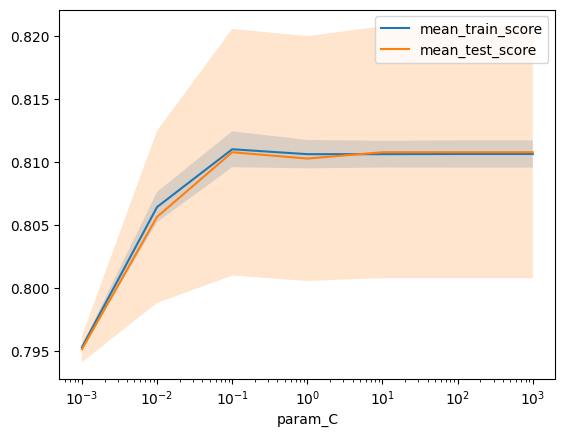

In [ ]:
results = pd.DataFrame(grid_search_lr.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_C.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.show()

### Decision tree

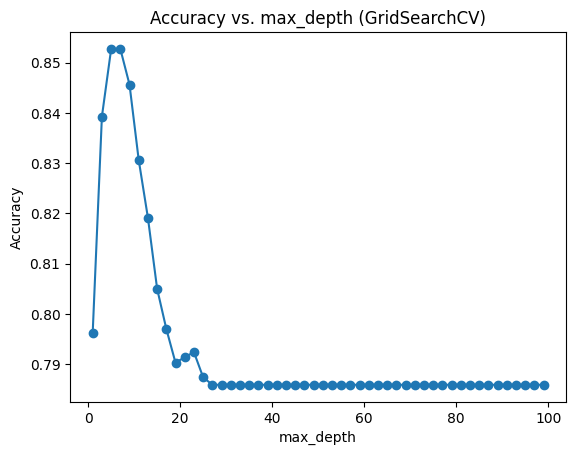


Model Evaluation:
Best Parameters:  {'max_depth': 7}
Best Cross-Validation: 0.8527500000


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define a range of max_depth values for the Decision Tree
param_grid = {'max_depth': list(range(1, 100, 2))}

# Create a DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV with the specified parameter grid and scoring metric (accuracy)
grid_search_dt = GridSearchCV(decision_tree, param_grid, scoring='accuracy', cv=10, return_train_score=True)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Plot the accuracy scores for different max_depth values
plt.plot(param_grid['max_depth'], grid_search_dt.cv_results_['mean_test_score'], marker='o')
plt.title('Accuracy vs. max_depth (GridSearchCV)')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

# Evaluate the model
print("\nModel Evaluation:")
print("Best Parameters: ", grid_search_dt.best_params_)
print("Best Cross-Validation: {:.10f}".format(grid_search_dt.best_score_))

In [ ]:
best_results = pd.DataFrame(grid_search_dt.cv_results_)
# print("Best parameter {}".format(grid_search_knn.cv_results_))
best_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007352,0.000628,0.002095,0.000509,1,{'max_depth': 1},0.79625,0.79625,0.79625,0.79625,0.79625,0.79625,0.79625,0.79625,0.79625,0.79625,0.796250,1.110223e-16,9,0.796250,0.796250,0.796250,0.796250,0.796250,0.796250,0.796250,0.796250,0.796250,0.796250,0.796250,1.110223e-16
1,0.013469,0.000708,0.002108,0.000382,3,{'max_depth': 3},0.84375,0.82250,0.83500,0.82875,0.84750,0.84000,0.85750,0.83750,0.84625,0.83375,0.839250,9.555757e-03,4,0.841667,0.841250,0.846806,0.843889,0.839306,0.840139,0.838194,0.846806,0.839444,0.842778,0.842028,2.876845e-03
2,0.018957,0.002110,0.002157,0.000542,5,{'max_depth': 5},0.87000,0.84875,0.85000,0.83625,0.85375,0.84250,0.87125,0.84500,0.86625,0.84250,0.852625,1.178519e-02,2,0.857361,0.860000,0.860694,0.861250,0.859167,0.860139,0.857639,0.859722,0.857778,0.860000,0.859375,1.280869e-03
3,0.021858,0.000658,0.001931,0.000305,7,{'max_depth': 7},0.86875,0.85000,0.85250,0.82250,0.84625,0.85375,0.86375,0.85750,0.87250,0.84000,0.852750,1.384964e-02,1,0.873611,0.873889,0.875972,0.875833,0.872917,0.876250,0.872639,0.873750,0.873611,0.876111,0.874458,1.344355e-03
4,0.026690,0.000539,0.002021,0.000085,9,{'max_depth': 9},0.85375,0.84875,0.83125,0.81875,0.84125,0.85375,0.85625,0.85625,0.86000,0.83625,0.845625,1.268919e-02,3,0.897361,0.895833,0.896806,0.896250,0.896111,0.894722,0.893889,0.888611,0.895972,0.895833,0.895139,2.364377e-03


<ipython-input-61-4d90f9ab425c>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_depth.astype(np.float),
<ipython-input-61-4d90f9ab425c>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_depth.astype(np.float),


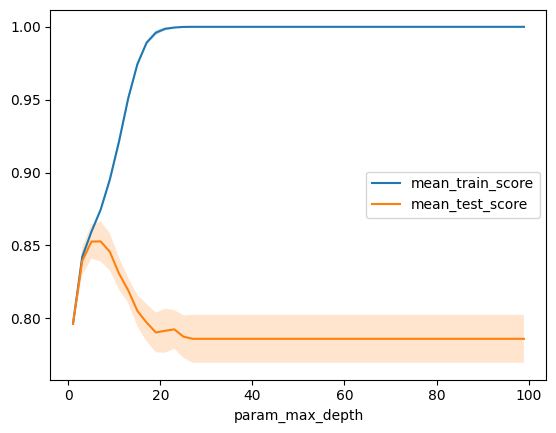

In [ ]:
results = pd.DataFrame(grid_search_dt.cv_results_)
results.plot('param_max_depth', 'mean_train_score')
results.plot('param_max_depth', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_max_depth.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_depth.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.show()

## Test model with hyperparameter


Model Evaluation on Test Set:
Accuracy on Test Set: 0.900


Text(0.5, 1.0, 'Classification Report (Test Set)')

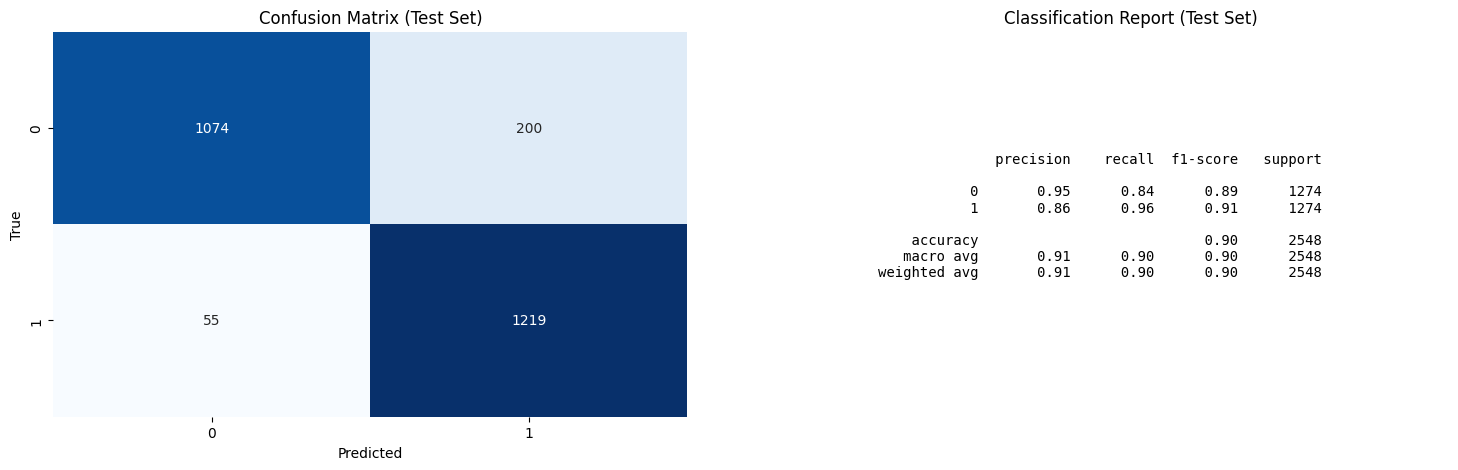

In [ ]:
# KNN test
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Create a new KNeighborsClassifier with the best parameters
best_knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])

# Fit the model on the training set
best_knn_model.fit(X_train, y_train)

# Predictions on the test set
y_test_pred = best_knn_model.predict(X_test)

# Evaluate the model on the test set
print("\nModel Evaluation on Test Set:")
print("Accuracy on Test Set: {:.3f}".format(accuracy_score(y_test, y_test_pred)))

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Plot the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax1)
ax1.set_title('Confusion Matrix (Test Set)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# Classification Report on the test set
class_report_test = classification_report(y_test, y_test_pred)
ax2.text(0.1, 0.5, class_report_test, va='center', fontfamily='monospace')
ax2.axis('off')
ax2.set_title('Classification Report (Test Set)')

# LIME + Model agnostic

In [ ]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
pipe_lr = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(max_iter=10000))])

param_grid_knn = {'knn__n_neighbors': np.arange(1, 30, 2)}
grid_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=10, return_train_score=True)

param_grid_lr = {"logistic__C": np.logspace(-3,3,7)}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, cv=10, return_train_score=True) #pipe ยัดลง grid search

grid_knn.fit(X_train, y_train) # train knn
print("-----------KNN:")
print("best mean cross-validation score: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))

grid_lr.fit(X_train, y_train) # train logistic
print("-----------LogReg:")
print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

NameError: ignored

In [ ]:
print("---------------TEST SCORE-------------------")
print("KNN: {}".format(grid_knn.score(X_test,y_test)))
print("LogReg: {}".format(grid_lr.score(X_test,y_test)))

In [ ]:
print(X_test[1]) # เลือกจุดในการทำ local interpret = LIME
print(X_test[2])
print(X_test[3])

## Create the explainer (Model agnostic tool)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, class_names=y_train, discretize_continuous=True)

### KNN

In [ ]:
exp = explainer.explain_instance(X_test[1], grid_knn.predict_proba, num_features=4, top_labels=1) # อธิบายว่าทำไม model predict ว่าเป็นสิ่งนี้
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
exp = explainer.explain_instance(X_test[2], grid_knn.predict_proba, num_features=4, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
exp = explainer.explain_instance(X_test[3], grid_knn.predict_proba, num_features=4, top_labels=2)
exp.show_in_notebook(show_table=True, show_all=False)

### Logistic Reg

In [ ]:
exp = explainer.explain_instance(X_test[1], grid_lr.predict_proba, num_features=4, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
exp = explainer.explain_instance(X_test[2], grid_knn.predict_proba, num_features=4, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
exp = explainer.explain_instance(X_test[3], grid_lr.predict_proba, num_features=4, top_labels=2)
exp.show_in_notebook(show_table=True, show_all=False)

Model by accuracy

In [ ]:
# Models
best_knn_classifier = grid_search_knn.best_estimator_
best_gb_classifier = grid_search_gb.best_estimator_
best_rf_classifier = grid_search_rf.best_estimator_
best_lr_classifier = grid_search_lr.best_estimator_
best_dt_classifier = grid_search_dt.best_estimator_

# List of classifiers and their names
classifiers = [best_knn_classifier, best_gb_classifier, best_rf_classifier, best_lr_classifier, best_dt_classifier]
classifier_names = ['KNN', 'Gradient Boosting', 'Random Forest', 'Logistic Regression', 'Decision Tree']

# Make predictions and display confusion matrix for each model
for clf, name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)

    # Display the confusion matrix
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    cm_display.plot(cmap='GnBu')
    plt.title(f'Confusion Matrix for {name} on Test Set (Percentages)')
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the evaluation metrics
    print(f"\nModel Evaluation for {name} on Test Set:")
    print("Accuracy: {:.2f}".format(accuracy))
    print("Mean Absolute Error: {:.2f}".format(mae))
    print("Mean Squared Error: {:.2f}".format(mse))
    print("R-squared: {:.2f}".format(r2))
    print("----------------------------------------")
